In [1]:
import os
import sys
import glob
import json

import pandas as pd

import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
basepath = os.path.join(os.getcwd(), "..")
dataset_filepath = os.path.join(basepath, "dataset")

old_profile_filepath = os.path.join(dataset_filepath, "profile", "partition_time=3696969600", "part-00000-8dd6d06b-b865-4a6d-86ec-8fa9bf4086d6.csv")
new_profile_filepath = os.path.join(dataset_filepath, "profile", "partition_time=3699475200", "part-00000-8dd6d06b-b865-4a6d-86ec-8fa9bf4086d6.csv")

cti_folder = os.path.join(dataset_filepath, "cti", "partition_time=3696969600")
cctxn_folder = os.path.join(dataset_filepath, "cctxn", "partition_time=3696969600")
atm_folder = os.path.join(dataset_filepath, "atm", "partition_time=3696969600")
mybank_folder = os.path.join(dataset_filepath, "mybank", "partition_time=3696969600")

In [3]:
columns = "cust_id,birth_time,gender,contact_loc,contact_code,register_loc,register_code,start_time,aum,net_profit,credit_card_flag,loan_flag,ddeposit_flag,wealth_flag,partition".split(",")

df = pd.read_csv(old_profile_filepath, names=columns)

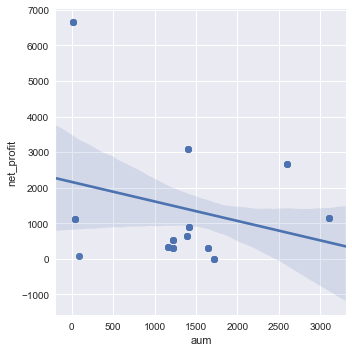

In [4]:
sns.lmplot('aum', 'net_profit', data=df)

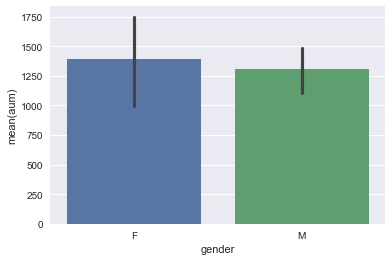

In [5]:
sns.barplot(x="gender", y="aum", data=df)

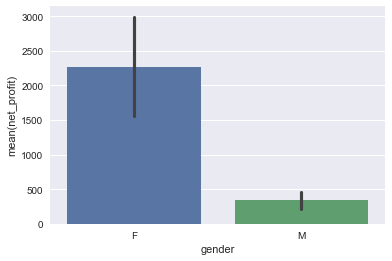

In [6]:
sns.barplot(x="gender", y="net_profit", data=df)

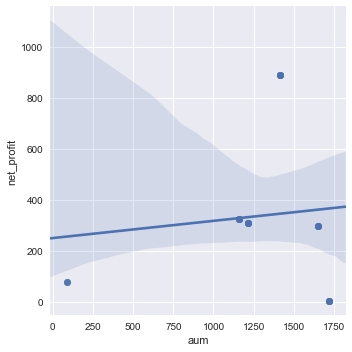

In [7]:
sns.lmplot('aum', 'net_profit', data=df[df.gender == "M"])

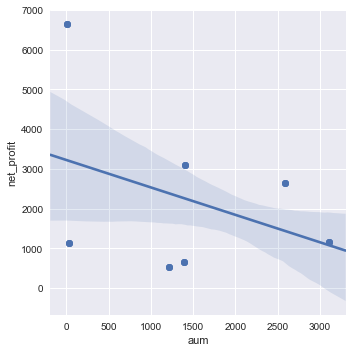

In [8]:
sns.lmplot('aum', 'net_profit', data=df[df.gender == "F"])

In [11]:
def get_dataframe(files):
    columns = "actor_type,actor_id,action_type,action_time,object_type,object_id,channel_type,channel_id,attrs,theme,partition"
    columns = columns.split(",")

    cti_frames = []
    for filepath in glob.glob(files):
        results = []
        with open(filepath, "rb") as in_file:
            for i, line in enumerate(in_file):
                fields = line.strip().split(",")
                values = fields[:8] + [",".join(fields[8:-1])] + [fields[-1]]

                results.append(dict(zip(columns, values)))

        df = pd.DataFrame(results)
        cti_frames.append(df)

    cti_df = pd.concat(cti_frames)
    #cti_df["attrs"] = cti_df["attrs"].map(lambda x: json.loads(x))
    
    return cti_df

In [12]:
cti_df = get_dataframe(os.path.join(cti_folder, "*csv"))
print cti_folder, cti_df.shape
    
cctxn_df = get_dataframe(os.path.join(cctxn_folder, "*csv"))
print cctxn_folder, cctxn_df.shape
    
atm_df = get_dataframe(os.path.join(atm_folder, "*csv"))
print atm_folder, atm_df.shape
    
mybank_df = get_dataframe(os.path.join(mybank_folder, "*csv"))
print mybank_folder, mybank_df.shape

/Users/rongqichen/Documents/programs/ntu_hackthon_2017/hackntu_x_cathay_2017/example/../dataset/cti/partition_time=3696969600 (454, 10)
/Users/rongqichen/Documents/programs/ntu_hackthon_2017/hackntu_x_cathay_2017/example/../dataset/cctxn/partition_time=3696969600 (3156, 10)
/Users/rongqichen/Documents/programs/ntu_hackthon_2017/hackntu_x_cathay_2017/example/../dataset/atm/partition_time=3696969600 (1934, 10)
/Users/rongqichen/Documents/programs/ntu_hackthon_2017/hackntu_x_cathay_2017/example/../dataset/mybank/partition_time=3696969600 (1124, 10)
